# D212 - Data Mining II
### OFM3 Task 2: Dimensionality Reduction Methods
#### Data Mining II — D212
#### PRFA — OFM3
> André Davis
> StudentID: 010630641
> MSDA
>
> Competencies
> 4030.06.5 : Dimensionality Reduction Methods
> The graduate implements dimension reduction methods to identify significant variables.

#### Table of Contents
<ul>
    <li><a href="#research-question">A1: Research Question</a></li>
    <li><a href="#objectives">A2: Objectives and Goals of Analysis</a></li>
    <li><a href="#explination-of-pca">B1: Explanation of Principal Component Analysis (PCA)</a></li>
    <li><a href="#assumptions">B2: Assumptions of PCA Analysis</a></li>
    <li><a href="#identifying-continuous-dataset">C1: Identifying Continuious Dataset Variables</a></li>
    <li><a href="#standardizing-variables">C2: Standardizing Dataset Variables</a></li>
    <li><a href="#principal-component-matrix">D1: Principal Component Matrix</a></li>
    <li><a href="#identify-number-of-components">D2: Identify Total Number of Components with Elbow Rule or Kaiser Criterion</a></li>
    <li><a href="#identify-variance">D3: Identify Variance of each Component</a></li>
    <li><a href="#identify-total-variance">D4: Identify Total Variance Captured by the PCA</a></li>
    <li><a href="#summary-of-data-analysis">D5: Summarize Data Analysis</a></li>
    <li><a href="#code-references">E: Code References</a></li>
    <li><a href="#source-references">F: Source References</a></li>
</ul>

<a id="research-question"></a>
# A1: Research Question

Can we utilize Principal Component Analysis on the `WGU Medical Dataset` to generate variables that encapsulate the majority of dataset variance, facilitating the removal of less relevant information and enhancing the dataset's suitability for analysis by analytical algorithms like machine learning?

<a id="objectives"></a>
# A2: Objectives and Goals of Analysis

The objective of this analysis is to identify the variables within the dataset that contribute significantly to its variance. This identification will enable us to streamline the dataset by retaining only the most impactful variables. Subsequently, we can create a subset of the dataset optimized for machine learning purposes, specifically for predicting critical outcomes such as re-admission rates.

<a id="explination-of-pca"></a>
# B1: Explanation of Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a statistical method used to simplify the complexity in high-dimensional (lots of columns) datasets while retaining as much of the original variance as possible. At its core, PCA seeks to identify "directions" or "principal components" in the data that capture the most variance. These components are orthogonal to each other, meaning the first principal component captures the most variance, the second (which is perpendicular to the first) captures the next highest amount, and so on. 


PCA works by transforming the original variables within a dataset by constructing new variables through optimal combinations of highly correlated variables, resulting in a set of uncorrelated variables. The term 'optimal' in this context refers to creating a combination of variables that best represents the underlying structure in the data. PCA identifies these combinations by looking at the covariance matrix of the original features and computing the eigenvalues and eigenvectors of this matrix. "The eigenvectors of the Covariance matrix are actually the directions of the axes where there is the most variance (most information) and that we call Principal Components. And eigenvalues are simply the coefficients attached to eigenvectors, which give the amount of variance carried in each Principal Component. By ranking your eigenvectors in order of their eigenvalues, highest to lowest, you get the principal components in order of significance." (Jaadi, A step-by-step explanation of principal component analysis (PCA)) The desired result is a collection of principal component variables derived from the dataset, poised for integration into a machine learning model, such as Random Forest Classification, etc.

<a id="assumptions"></a>
# B2: Assumption of PCA Analysis
##### Summarize 1 assumption of PCA.

One underlying assumption of PCA pertains to the nature of the variables subjected to it, necessitating that they be continuous. This is rooted in the fact that PCA's core operation involves measuring distances between data points to construct its principal components. For categorical variables, distances lack meaningful interpretation, rendering them incompatible with PCA's distance-based approach.

<a id="identifying-continuous-dataset"></a>
# C1: Identifying Continuous Dataset Variables

Principal Component Analysis (PCA) is specifically tailored for quantitative data, as it produces a matrix based on covariance calculations, which necessitate numerical input. While there exist variants of PCA suited for qualitative (categorical) data, those fall outside the purview of this performance assessment. Therefore, we will focus on the quantitative features from the `medical_clean.csv` dataset provided by [`WGU`](https://www.wgu.edu/).

| Continuous Feature Name | Description ([`WGU Data Dictionary`](https://access.wgu.edu/ASP3/aap/content/jf8rcds032ldktfces9r.html))                                                                                                                                                    |
|-------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Lat                     | GPS coordinates of patient residence as listed on the billing statement                                                                                                                                                                                     |
| Lng                     | GPS coordinates of patient residence as listed on the billing statement                                                                                                                                                                                     |
| Population              | Population within a mile radius of patient, based on census data                                                                                                                                                                                            |
| Children                | Number of children in the patient’s household as reported in the admissions information might not be children of the patient                                                                                                                                |
| Age                     | Age of the patient as reported in admissions information                                                                                                                                                                                                    |
| Income                  | Annual income of the patient (or primary insurance holder) as reported at time of admission                                                                                                                                                                 |
| VitD_levels             | The patient’s vitamin D levels as measured in ng/mL                                                                                                                                                                                                         |
| Doc_visits              | Number of times the primary physician visited the patient during the initial hospitalization                                                                                                                                                                |
| Full_meals_eaten        | Number of full meals the patient ate while hospitalized (partial meals count as 0, and some patients had more than three meals in a day if requested)                                                                                                       |
| VitD_supp               | The number of times that vitamin D supplements were administered to the patient                                                                                                                                                                             |
| Initial_days            | The number of days the patient stayed in the hospital during the initial visit                                                                                                                                                                              |
| TotalCharge             | The amount charged to the patient daily. This value reflects an average per patient based on the total charge divided by the number of days hospitalized. This amount reflects the typical charges billed to patients not including specialized treatments. |
| Additional_charges      | The average amount charged to the patient for miscellaneous procedures, treatments, medicines, anesthesiology, etc                                                                                                                                          |

In a preliminary assessment, certain features appear to be candidates for removal based on visual inspection. However, to ensure a thorough and systematic evaluation, we will employ the Principal Component Analysis (PCA) method and refrain from manually eliminating any quantitative (numerical) features.

<a id="standardizing-variables"></a>
# C2: Standardizing Dataset Variables

This performance assessment is organized into distinct sections to ensure each step is clearly presented and comprehensively executed. While the entire process can be streamlined using [`Scikit-Learn Pipelines`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline), we've chosen not to employ this method here for the sake of clarity in demonstrating the assessment.

In this analysis, we will import the `medical_clean.csv` dataset, which is provided by [`WGU`](https://www.wgu.edu/), and proceed with its standardization. For this standardization phase, we will focus solely on the quantitative (numerical) values as outlined in Section `C1`. This process encompasses two primary steps:

   1. **Standardization**: This involves scaling all values such that they have a mean of 0 and a standard deviation (std) of 1. This transformation will be executed using the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) library.
   
   2. **Covariance Matrix Generation**: The resulting matrix will help us identify if any of the features (columns) display perfect correlation. In cases of perfect correlation between features, redundancy is evident; hence, one feature can be retained while the correlated counterpart is discarded.

In [1]:
from typing import List, Tuple
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set max rows to display all rows without truncation
pd.set_option('display.max_rows', None)

color_map = 'BuGn'

medical_clean = pd.read_csv('./medical_clean.csv', index_col=0)
#print(medical_clean)

#These are the columns stated within Section C1 of the performance assessment
quantitative_columns = [
    'Lat',
    'Lng',
    'Population',
    'Children',
    'Age',
    'Income',
    'VitD_levels',
    'Doc_visits',
    'Full_meals_eaten',
    'vitD_supp',
    'Initial_days',
    'TotalCharge',
    'Additional_charges'
]

mapping = { 'Yes': 1, 'No': 0 }
medical_clean['ReAdmis'] = medical_clean['ReAdmis'].map(mapping)

features = medical_clean[quantitative_columns].copy()

print('Quantitative (Numerical) Features')
print(features)

Quantitative (Numerical) Features
                Lat        Lng  Population  Children  Age     Income   
CaseOrder                                                              
1          34.34960  -86.72508        2951         1   53   86575.93  \
2          30.84513  -85.22907       11303         3   51   46805.99   
3          43.54321  -96.63772       17125         3   53   14370.14   
4          43.89744  -93.51479        2162         0   78   39741.49   
5          37.59894  -76.88958        5287         1   22    1209.56   
6          35.67302  -95.19180         981         3   76   81999.88   
7          41.67511  -81.05788        2558         0   50   10456.05   
8          39.08062  -78.39150         479         7   40   38319.29   
9          30.20097  -85.50610       40029         0   48   55586.48   
10         45.40325  -94.71424        5840         2   78   38965.22   
11         32.59914  -88.67903         426         4   55   38503.82   
12         28.66268  -81.31427

In [2]:
'''
Standardization Process:
    X features will be standardized to prevent larger values from dominating the smaller features
        1. Fit the data model 
        2. Transform the data into the standardized format.
        3. Verify that the standardization happened
        
    NOTE: there is a "fit_transform" function but I have separated these steps for clarity.
'''

def standardize_features(raw_features: pd.DataFrame, columns: List[str]) -> pd.DataFrame:
    """Function for standardizing the features as this process can be repeated"""
    standard_scaler = StandardScaler()
    standard_scaler.fit(raw_features)
    
    scaled_data = standard_scaler.transform(raw_features.copy())
    
    scaled_features = pd.DataFrame(scaled_data, columns=columns)
    scaled_features.reset_index(drop=True, inplace=True)
    return scaled_features


std_features = standardize_features(features, quantitative_columns)
std_features

Lat       Lng  Population  Children       Age    Income   
0    -0.814668  0.297134   -0.473168 -0.507129 -0.024795  1.615914  \
1    -1.463305  0.395522    0.090242  0.417277 -0.121706  0.221443   
2     0.886966 -0.354788    0.482983  0.417277 -0.024795 -0.915870   
3     0.952530 -0.149403   -0.526393 -0.969332  1.186592 -0.026263   
4    -0.213252  0.943984   -0.315586 -0.507129 -1.526914 -1.377325   
5    -0.569718 -0.259695   -0.606061  0.417277  1.089681  1.455462   
6     0.541201  0.669848   -0.499679 -0.969332 -0.170161 -1.053111   
7     0.060991  0.845207   -0.639925  2.266090 -0.654716 -0.076130   
8    -1.582532  0.377303    2.028043 -0.969332 -0.267072  0.529317   
9     1.231238 -0.228287   -0.278282 -0.044926  1.186592 -0.053481   
10   -1.138658  0.168629   -0.643500  0.879480  0.072116 -0.069660   
11   -1.867252  0.652986    1.713688 -0.507129  0.508215 -0.924420   
12    0.781182  0.221643   -0.032937 -0.969332 -0.606260 -0.949471   
13    0.606958 -0.270649   -0.011620 -0.507129 -0.412438 -0.284722   
14    0.802019 -0.326816   -0.094458 -0.507129  1.525780  0.037437   
15   -0.731872  0.311541    1.193519 -0.507129  0.169027  2.222181   
16   -0.926300 -1.540578    0.821892  3.652699 -0.460894 -0.569430   
17    0.303039  0.377945   -0.630953 -0.969332  0.023661 -0.811539   
18   -0.064733  0.882645   -0.622048 -0.507129  0.895859  0.744515   
19   -0.038998 -0.124112   -0.653281 -0.969332  1.477325  0.756113   
20    1.149984 -0.123734    0.268601 -0.044926  1.574236 -1.115159   
21    0.605805  0.505713   -0.498600  0.879480 -0.073250 -1.059294   
22    0.440321 -0.714195   -0.623060 -0.969332 -1.090815  0.600678   
23   -0.332780 -0.228296   -0.478025  0.417277 -0.800082 -0.273934   
24   -1.444425  0.386291   -0.610580 -0.969332 -1.672281 -0.896399   
25    0.546447  0.809887   -0.650043 -0.969332  1.041226  0.507780   
26   -0.908619 -0.017043   -0.658611 -0.969332 -0.267072  0.474964   
27   -0.097277  0.665287   -0.636687 -0.044926  0.798948  1.273706   
28    0.500950  0.671943    0.307457 -0.044926  0.750493 -0.590835   
29    0.739657 -0.028992   -0.621576  1.341683  0.120572 -0.297363   
30   -0.317830 -0.313461   -0.661444 -0.969332 -0.606260  4.439545   
31    0.464153  1.396606   -0.671428  0.417277 -1.042359 -0.484419   
32    0.051412  0.439430    2.029527 -0.969332 -1.284637  0.142821   
33   -0.540503 -0.162238   -0.652202 -0.044926  1.186592 -0.928706   
34    0.722255  1.146504    0.804825 -0.044926  1.574236 -0.180664   
35    0.936001  1.251861   -0.604172 -0.969332  0.556671 -0.532063   
36    0.661916  1.316146   -0.288535 -0.507129 -1.381548  2.879597   
37    0.671676  1.322469    1.947498 -0.507129  0.072116 -1.347437   
38    0.471597 -0.320052    1.293694  0.417277  0.072116 -0.961784   
39    0.406672  0.849340   -0.549733  0.417277  0.798948 -0.961834   
40   -0.110433  0.491653   -0.208463  0.417277  1.235047  0.493153   
41    0.465232 -0.313003    0.310560  2.728293  1.525780  0.448446   
42    0.025026  0.934738   -0.672237 -0.969332  0.169027 -0.403753   
43    0.495007  1.022224    0.712745 -0.044926 -1.430003 -1.280274   
44   -1.023296  0.270882   -0.672237 -0.969332 -0.606260 -1.054834   
45   -0.907549  0.358945    0.723741 -0.507129 -1.381548  0.828244   
46    0.108249 -0.318457   -0.645524  2.266090  1.719602 -0.971417   
47    0.849470  0.173227   -0.558165 -0.044926  0.217483 -0.190229   
48    0.507078 -0.254545   -0.653416  0.417277 -1.381548 -0.395035   
49   -0.061383  0.088956   -0.281317 -0.507129  0.314394  0.572742   
50    1.844807 -0.713049   -0.581304 -0.969332 -0.993904  2.127254   
51    0.096420 -2.022706   -0.149976  0.417277 -0.267072  0.833700   
52    0.416468  0.177999   -0.582315 -0.507129  1.428869 -0.758224   
53   -0.398649 -0.229881    0.361356 -0.507129  0.023661  0.016815   
54    0.165966  0.739601   -0.502647 -0.969332  0.605126 -1.296568   
55   -0.401244  0.763440   -0.531452 -0.044926  0.944315 -0.835769   
56    0.648782 -0.253

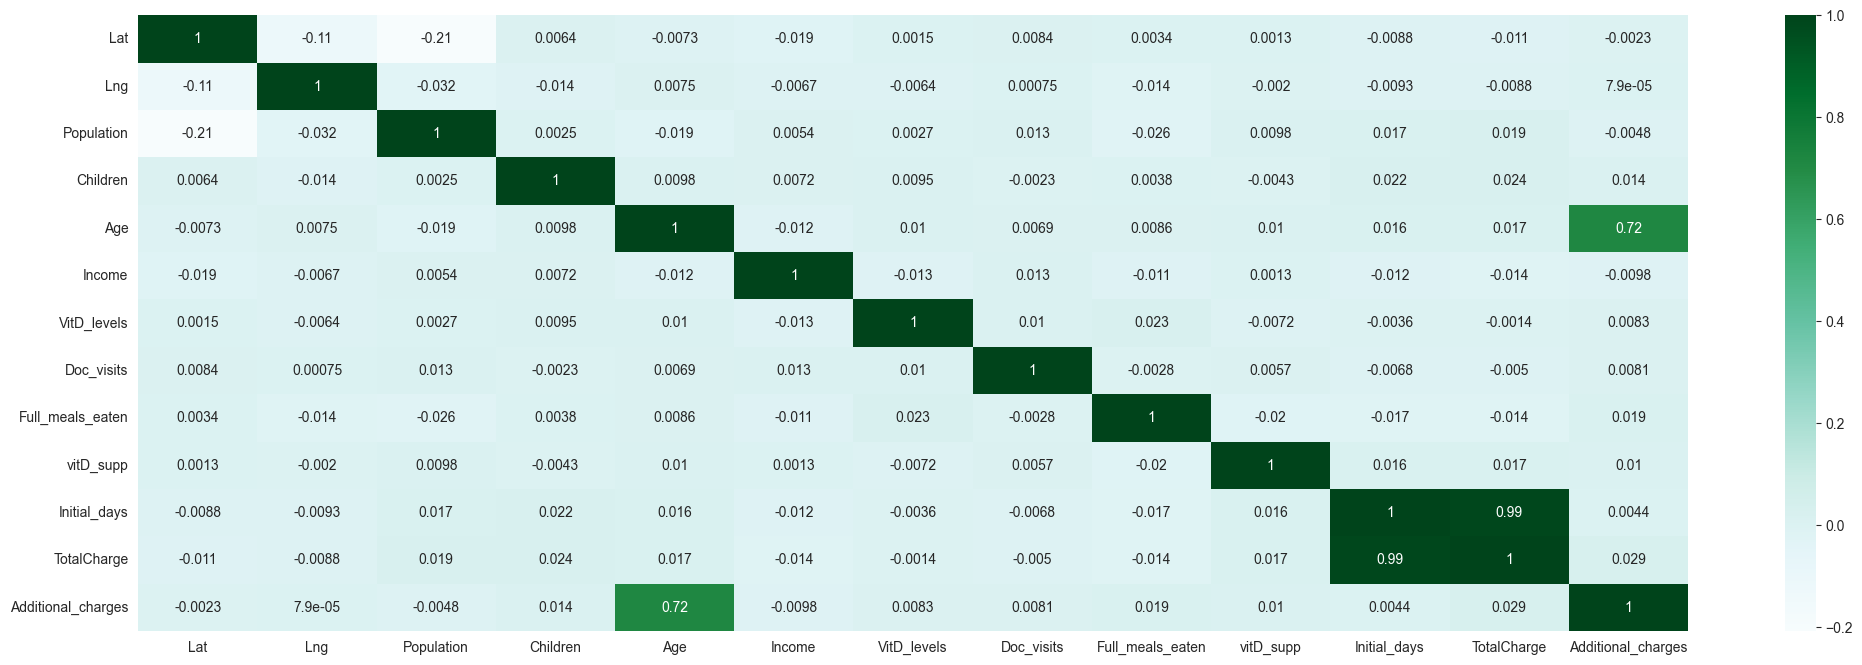

In [3]:
'''
Covariance Matrix
    Is a matrix that provides linear relationships between features (columns). A positive covariance value indicates that as one variable increases, the other tends to increase as well, while a negative value indicates that as one variable increases, the other tends to decrease. If the covariance is zero, it suggests that there's no linear relationship between those two variables.
'''

def display_covariance_matrix(scaled_features: pd.DataFrame, filename: str) -> pd.DataFrame:
    features_covariance_matrix = scaled_features.cov()
    
    plt.figure(figsize=(25, 8))  # Adjust the figure size as needed
    sns.heatmap(features_covariance_matrix, cmap=color_map, annot=True)
    plt.savefig(filename)
    plt.show()
    
    return features_covariance_matrix

covariance_matrix = display_covariance_matrix(std_features, './original-scaled-features-covariance-matrix.png')



###### Results of Co-Variance Matrix

The feature `TotalCharge`, representing daily charges, exhibits an extremely high correlation of 99% (0.99) with `Initial_days`, which denotes the duration of the initial hospital visit. Given the redundancy due to this near-perfect correlation, one of these features should be excluded. We will opt to remove 'Initial_days', positing that 'Additional_charges' could be more pertinent when considered alongside 'Total_charges'. After selecting an item for removal, the covariance matrix should be recalculated to ensure accuracy. It seems within the data community that 80% (.8) or 90% (.9) is grounds for removal. It should be noted that `Additional_charges` was high at 72% (.72) but was below the 80% threshold and was not removed.

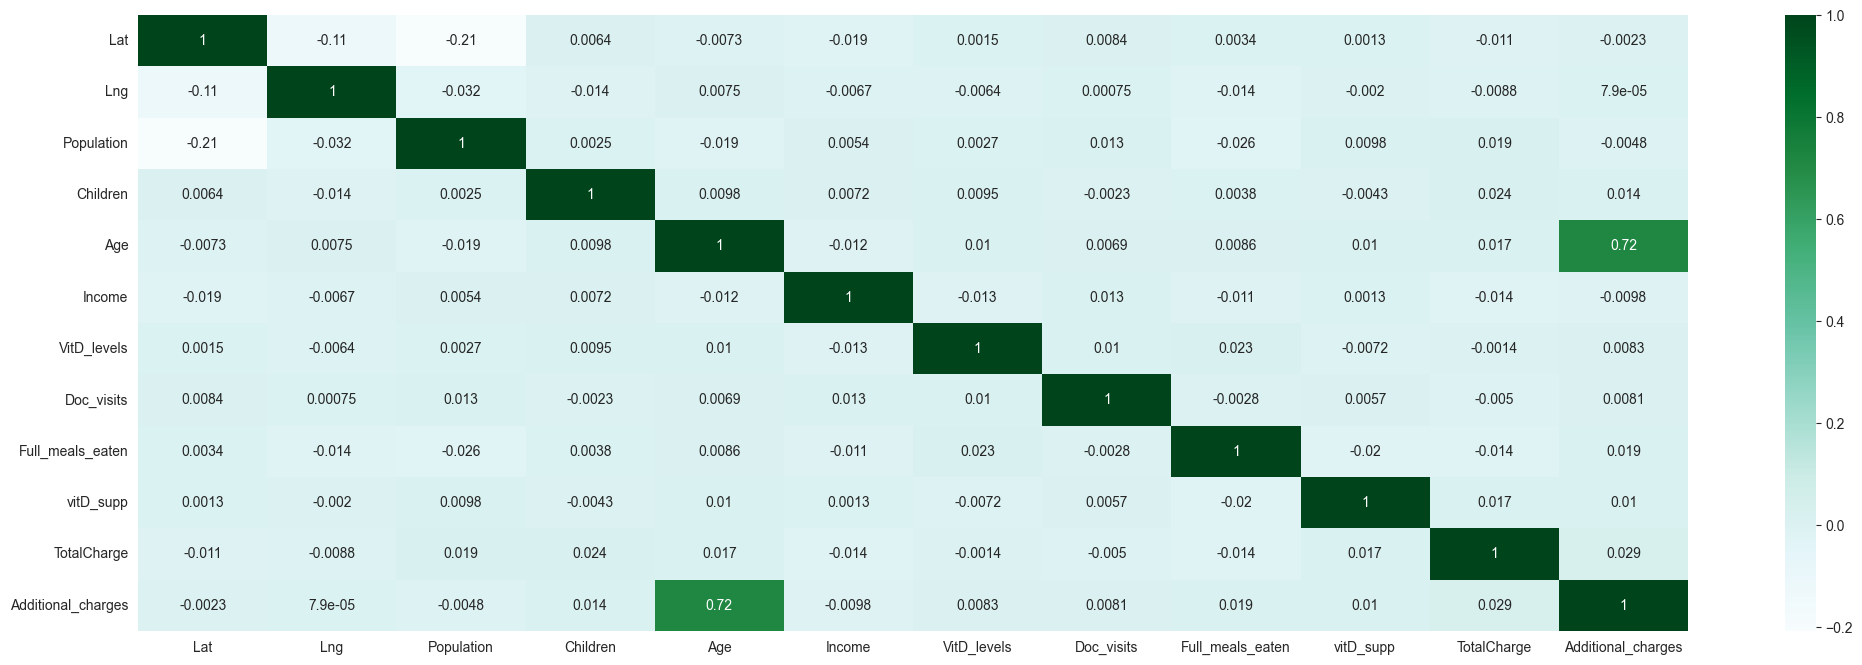

In [4]:
quantitative_columns.remove('Initial_days')
adjusted_x_features = medical_clean[quantitative_columns].copy() 

std_features = standardize_features(adjusted_x_features, quantitative_columns)

adjusted_covariance_matrix = display_covariance_matrix(std_features, './scaled-features-covariance-matrix-removal.png')

In [5]:
'''
Save Standardized and cleaned
'''
std_features.to_csv('./C2-cleaned-and-standardized-data.csv')


<a id="principal-component-matrix"></a>
# D1: Principal Component Matrix

The sequence of our data processing begins with the standardization of the dataset, followed by the elimination of highly correlated features. Subsequently, we'll proceed with the Principal Component Analysis (PCA). During this stage, we will fit the model and employ it to achieve dimensionality reduction. To discern which features (columns) exert the most influence on a given principal component (`PC`), we will generate and inspect the PCA loadings.

[`PCA Documentation`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [6]:
n_components = len(quantitative_columns)
random_state = 999 # Pass an int for reproducible results across multiple function calls.

pca_component_labels = list()
for i in range(1, n_components + 1): #range is not inclusive of stop value so +1
    pca_component_labels.append(f'PC{i}')

def calculate_pca_loadings(num_components: int, r_state: int, component_labels: List[str]) -> Tuple[PCA, pd.DataFrame]:
    pca_reduction = PCA(n_components=num_components, random_state=r_state)
    
    #Fit the model with features(x)
    pca_reduction.fit(std_features)
    
    #Apply dimensional reduction to features(x)
    _ = pca_reduction.transform(std_features)
    
    loadings = pd.DataFrame(pca_reduction.components_.T, columns=component_labels, index=quantitative_columns)
    return pca_reduction, loadings
    

pca, pca_loadings = calculate_pca_loadings(num_components=n_components, r_state=random_state, component_labels=pca_component_labels)

print(f'Principal Components Matrix')
pca_loadings

Principal Components Matrix


PC1       PC2       PC3       PC4       PC5   
Lat                -0.003706 -0.711906  0.122277 -0.087242  0.029517  \
Lng                 0.007387  0.264705 -0.607933 -0.216542 -0.262329   
Population         -0.021805  0.629980  0.282769  0.173680  0.122271   
Children            0.024164 -0.021566  0.392144  0.236578 -0.092707   
Age                 0.705026  0.005293 -0.024649 -0.020788  0.023619   
Income             -0.022866  0.068761  0.055112 -0.193647  0.623964   
VitD_levels         0.019563 -0.021333  0.013090  0.568556  0.025845   
Doc_visits          0.013734  0.013909  0.071921  0.002147  0.566065   
Full_meals_eaten    0.026960 -0.110972 -0.205467  0.578013  0.015149   
vitD_supp           0.019631  0.038684  0.294348 -0.402200 -0.056661   
TotalCharge         0.045578  0.080536  0.493819 -0.046981 -0.437907   
Additional_charges  0.705356  0.008921 -0.005270 -0.010099  0.024034   

                         PC6       PC7       PC8       PC9      PC10   
Lat                -0.042485  0.007831 -0.058782 -0.050674  0.009613  \
Lng                -0.031279 -0.534935  0.071364  0.051986  0.046295   
Population         -0.032818  0.282328 -0.068587 -0.016638 -0.115545   
Children            0.440297 -0.563669  0.105724  0.027523 -0.506993   
Age                 0.014930  0.024480 -0.007323 -0.027520 -0.012811   
Income              0.438405 -0.164157  0.345736 -0.087786  0.464049   
VitD_levels        -0.403111 -0.255950  0.219052 -0.591942  0.220595   
Doc_visits         -0.474680 -0.394948 -0.408536  0.339420 -0.086013   
Full_meals_eaten    0.028523  0.112704  0.361068  0.667467  0.124176   
vitD_supp          -0.468634 -0.021306  0.689366  0.132535 -0.182477   
TotalCharge        -0.035805 -0.230783 -0.188281  0.237485  0.638021   
Additional_charges  0.017984  0.029878 -0.007212 -0.012345 -0.004127   

                        PC11      PC12  
Lat                 0.679469  0.009092  
Lng                 0.384047 -0.004724  
Population          0.614972  0.016406  
Children           -0.006271  0.002978  
Age                -0.001179  0.706763  
Income              0.056096  0.002764  
VitD_levels        -0.003262 -0.002444  
Doc_visits         -0.056564  0.000887  
Full_meals_eaten    0.074007  0.010865  
vitD_supp          -0.018465  0.000060  
TotalCharge         0.001409  0.012019  
Additional_charges  0.020557 -0.706984

<a id="identify-number-of-components"></a>
# D2: Identify Total Number of Components with Elbow Rule or Kaiser Criterion

Elbow Rule will be used.

In [7]:
features = range(1, pca.n_components_ + 1)
print('Explained Variance Ratios:')
print(pca.explained_variance_ratio_)

Explained Variance Ratios:
[0.14339538 0.10243026 0.08757042 0.086647   0.08519923 0.08374234
 0.08315565 0.08147692 0.08076371 0.07984831 0.06221038 0.02356039]


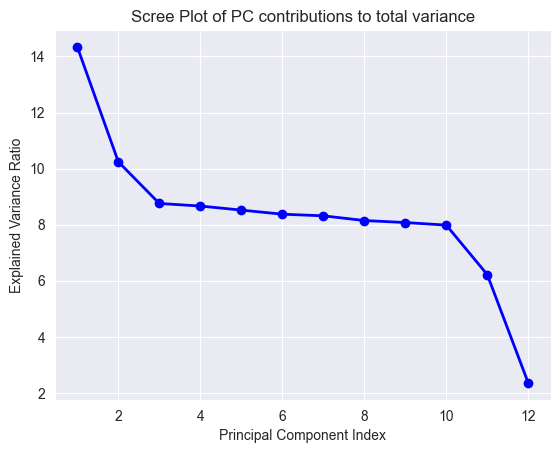

In [8]:
plt.plot(features, pca.explained_variance_ratio_ * 100, 'o-', linewidth=2, color='blue')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot of PC contributions to total variance')
plt.savefig('./scree.png')
plt.show()

The `Elbow Rule` and finding the first elbow like bend in the scree chart it would seem our best pick are the first 3 principal components.

<a id="identify-variance"></a>
# D3: Identify Variance of each Component identified in part D2.

In [9]:
elbow_rule_total = 3
elbow_rule_loadings = pca_loadings[pca_component_labels[:elbow_rule_total]]
#print(elbow_rule_loadings)
print(f'Total of Selected PC by Elbow Rule Value: {len(elbow_rule_loadings.columns)}')

def generate_pc_variance_table(columns: List[str], explained_variance_ratios: np.array) -> pd.DataFrame:
    data = {
        'Principal Component': columns,
        'Variance Contribution (%)': np.round(explained_variance_ratios * 100, 3)
    }

    pc_variance_table = pd.DataFrame(data, index=None)
    return pc_variance_table

elbow_pc_variance = generate_pc_variance_table(elbow_rule_loadings.columns, pca.explained_variance_ratio_[:elbow_rule_total])
elbow_pc_variance

Total of Selected PC by Elbow Rule Value: 3


Principal Component  Variance Contribution (%)
0                 PC1                     14.340
1                 PC2                     10.243
2                 PC3                      8.757

<a id="identify-total-variance"></a>
# D4: Identify Total Variance Captured by the PCA identified in part D2.


In [10]:
total_variance_data = {
    'Total Variance (%)': elbow_pc_variance['Variance Contribution (%)'].sum()
}
total_variance = pd.DataFrame(total_variance_data, index=[0])
total_variance

Total Variance (%)
0               33.34

<a id="summary-of-data-analysis"></a>
# D5: Summarize Data Analysis

At the outset of our analysis, we refined the `WGU Medical Dataset` to encompass 12 quantitative (numerical) features, as PCA Analysis necessitates numeric values. Subsequently, we embarked on the process of "standardizing" these 12 features. This step was imperative since the PCA process is sensitive to varying value scales. Following the completion of the standardization, we proceeded to execute PCA on these features, yielding 12 principal components.

We visualized the distribution of the `explained variance ratios` through a scree graph and applied the `Elbow Rule`—a visual examination for a point of inflection in the graph. Typically, this inflection indicates where a significant portion of the variance is retained. In our case, the elbow was discerned at the third Principal Component. These three Principal Components collectively account for 33.44% of the entire variance within the quantitative features of the `WGU Medical Dataset`.

While this might appear as a substantial reduction in dataset dimensions, it holds promising potential for mitigating overfitting when deploying Machine Learning Algorithms. It remains intriguing to re-run the analysis using the Kaiser Criterion (eigenvalues), exploring different cutoff points and variance totals it might generate.

<a id="code-references"></a>
# E1: Code References

 N/A

<a id="source-references"></a>
# F1: Source References

 * Jaadi, Z. (n.d.). A step-by-step explanation of principal component analysis (PCA). Built In. https://builtin.com/data-science/step-step-explanation-principal-component-analysis 